### C S 329E HW 4

## Pair Programming Group Number: 19
## Members of Team: Yixing Ma, Daniel Lam

## Decision Tree Classifier


For this weeks homework we are going to explore ideas around decision tree implementation!  

We will implement some helper functions that would be necessary for a home-grown tree:
  - calc_entropy
  - calc_gini
  
and them test them out at given data splits. 
  
And finally, to perform predictive and descriptive analytics we use the [Decision Tree Classifier](https://scikit-learn.org/stable/modules/tree.html#classification) class in the scikit-learn package.

  
For this assignment, the stopping condition will be the depth of the tree. The impurity measure can be either `Entropy` or `Gini`.

To test our tree built from the Decision Tree Classifier class, we will revisit our Melbourne housing data (that has been cleaned and pruned) and use the files:

   - `melb_tree_train.csv` for training the decision tree (we'll also see what happens if we use the same data to test as we used to train the data in the last problem)
   - `melb_tree_test.csv` for testing the decision tree

There are 10 features in these dataframes that we can use to describe and predict the class label housing "Type", which is 'h' house, 'u' duplex, or 't' townhome. 

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log2
from sklearn import tree # you'll probably need to install this - look at Q6 for a link 
import graphviz # you'll probably need to install this - look at Q6 for a link 

In [2]:
df_train = pd.read_csv('https://gist.githubusercontent.com/yanyanzheng96/f8ba57f8377dee0810271475c728fca8/raw/afa3fa4305b55e31135980835d40b27af31f288c/melb_tree_train.csv')
df_train.head()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,2,t,771000.0,13.8,2.0,1.0,1.0,0.0,99.0,1992.0,Bayside
1,3,t,700000.0,7.9,3.0,2.0,1.0,189.0,110.0,1990.0,Banyule
2,3,u,975000.0,12.1,3.0,2.0,1.0,277.0,109.0,1975.0,Glen Eira
3,3,h,1290000.0,8.0,3.0,1.0,1.0,618.0,132.0,1960.0,Moonee Valley
4,2,u,500000.0,4.2,2.0,1.0,1.0,0.0,86.0,2000.0,Melbourne


In [3]:
df_test = pd.read_csv('https://gist.githubusercontent.com/yanyanzheng96/ec66da011b165f0e282c0c1f8447010e/raw/d02c3829a7e9db2d156ba1ab9d5bb4d18ae57be8/melb_tree_test.csv')
df_test.head()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,2,t,930000.0,2.6,2.0,1.0,1.0,97.0,85.0,2004.0,Yarra
1,3,t,815000.0,11.0,3.0,2.0,2.0,159.0,130.0,2014.0,Hobsons Bay
2,4,h,638000.0,13.0,4.0,2.0,1.0,624.0,258.0,2005.0,Moreland
3,2,t,595000.0,11.2,2.0,2.0,1.0,201.0,111.0,2005.0,Moreland
4,3,t,620500.0,11.2,3.0,2.0,1.0,158.0,117.0,2011.0,Darebin


## Q1 Load the Data
Load in the melb_tree_train.csv into a dataframe, and split that dataframe into `df_X`, which contains the features of the data set (everything but `Type`), and `s_y`, the series containing just the class label (just `Type`). The lengths of `df_X` and `s_y` should match.

In [4]:
s_y = pd.Series(df_train['Type'])
df_x = df_train.drop(columns = ["Type"])
len(s_y) == len(df_x)
s_y

0      t
1      t
2      u
3      h
4      u
      ..
805    t
806    u
807    t
808    t
809    h
Name: Type, Length: 810, dtype: object

## Q2 Implement a function to calculate entropy 
Implement a function `calc_entropy` that takes the the class label series, `s_y`, as a parameter. Implement using the definition on p128 in the DM book and only use pandas and log2 libraries

In [5]:
# calc_entropy(s_y) definition
def calc_entropy(s_y):
  dumm = pd.get_dummies(s_y)
  h_1 = dumm["h"].value_counts()[1]
  u_1 = dumm["u"].value_counts()[1]
  t_1 = dumm["t"].value_counts()[1]
  
  h_perc = h_1/len(s_y)
  u_perc = u_1/len(s_y)
  t_perc = t_1/len(s_y)

  entropy = - h_perc * log2(h_perc) - u_perc * log2(u_perc) - t_perc * log2(t_perc)



  return entropy
  

  



## Q3 Use the entropy function to
  - (a) Calculate the entropy of the entire training set
  - (b) Calculate the entropy of the three partitions formed from the following three intervals:

(i) Landsize $\in [0,200]$

(ii) Landsize $\in (200,450]$

(iii) Landsize $\in (450, \infty)$

In [6]:
# The entire data set
calc_entropy(s_y)

1.5825333114261775

In [7]:
# Less than or equal to 200

s_landsize_lt200 = df_train[df_train['Landsize'] <= 200]
calc_entropy(s_landsize_lt200['Type'])


1.3456432116206725

In [8]:
# Between 200 and 450
s_landsize_mt200 = df_train[df_train['Landsize'] > 200]
s_landsize_lt450 = s_landsize_mt200[s_landsize_mt200['Landsize'] <= 450]
calc_entropy(s_landsize_lt450['Type'])


1.4660501816027978

In [9]:
# greater than 450

s_landsize_gt450 = df_train[df_train['Landsize'] > 450]
calc_entropy(s_landsize_gt450['Type'])


1.09954792005911

## Q4 Implement a function to calculate the Gini Index
Implement the function `calc_gini` that takes the class label series, `s_y`, as a parameter. Implement using the definition on p128 in the DM book and only use the pandas library.

In [10]:
def calc_gini( s_y ):
  dumm = pd.get_dummies(s_y)
  h_1 = dumm["h"].value_counts()[1]
  u_1 = dumm["u"].value_counts()[1]
  t_1 = dumm["t"].value_counts()[1]
  
  h_perc = h_1/len(s_y)
  u_perc = u_1/len(s_y)
  t_perc = t_1/len(s_y)

  gini = 1 - h_perc**2  - u_perc**2  - t_perc **2
  return gini


  

## Q5 Use the Gini Index function to
  - (a) Calculate the Gini index of the entire training set
  - (b) Calculate the Gini index of the three partitions formed from the following three intervals:

(i) Landsize $\in [0,200]$

(ii) Landsize $\in (200,450]$

(iii) Landsize $\in (450, \infty)$

In [11]:
# The entire data set
calc_gini(s_y)

0.6655601280292637

In [12]:
# Less than or equal to 200
s_landsize_lt200 = df_train[df_train['Landsize'] <= 200]
calc_gini(s_landsize_lt200['Type'])


0.5741211482422965

In [13]:
# Between 200 and 450
s_landsize_mt200 = df_train[df_train['Landsize'] > 200]
s_landsize_lt450 = s_landsize_mt200[s_landsize_mt200['Landsize'] <= 450]
calc_gini(s_landsize_lt450['Type'])


0.6101021682602731

In [14]:
# greater than 450
s_landsize_gt450 = df_train[df_train['Landsize'] > 450]
calc_gini(s_landsize_gt450['Type'])


0.4381934171597633

## Q6 Create a decision tree 
Using [scikit-learn](https://scikit-learn.org/stable/modules/tree.html#tree) create a multi class classifer for the data set using the Entropy impurity measure and a max depth of 3.

Note that scikit-learn's algorithm doesn't handle categorical data, so that needs to be preprocessed using an one hot encoding.

Display the tree using `export_text` from sklearn.tree, and use that information to write some descriptive analytics on the classification of houses.  For extra fun, use the export_graphviz to draw the graph (see documentation on the [scikit-learn webpage](https://scikit-learn.org/stable/modules/tree.html#classification)). 

In [15]:
# Create Tree
pd.get_dummies(df_x['CouncilArea'])
df_one_hot = pd.get_dummies(df_x["CouncilArea"])
df_all = pd.concat([df_x, df_one_hot], axis=1)
df_all = df_all.drop(columns = ['CouncilArea'])



In [16]:
# Display text version of the tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(df_all, s_y)
pr = tree.export_text(clf)
print(pr)


|--- feature_8 <= 1977.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_1 <= 915000.00
|   |   |   |--- class: u
|   |   |--- feature_1 >  915000.00
|   |   |   |--- class: h
|   |--- feature_0 >  2.50
|   |   |--- feature_6 <= 429.00
|   |   |   |--- class: h
|   |   |--- feature_6 >  429.00
|   |   |   |--- class: h
|--- feature_8 >  1977.50
|   |--- feature_7 <= 104.31
|   |   |--- feature_6 <= 76.00
|   |   |   |--- class: u
|   |   |--- feature_6 >  76.00
|   |   |   |--- class: t
|   |--- feature_7 >  104.31
|   |   |--- feature_6 <= 391.00
|   |   |   |--- class: t
|   |   |--- feature_6 >  391.00
|   |   |   |--- class: h



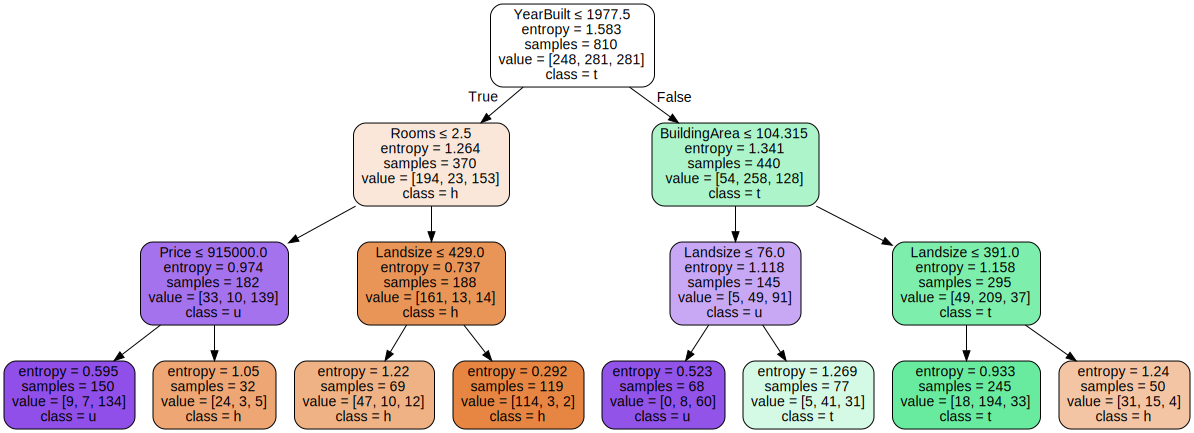

In [17]:
# Display graphviz version of the tree
names_list = list(df_all)
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True,
                                feature_names=names_list, class_names=['h','t','u'])
graph = graphviz.Source(dot_data)
graph

➡️ Answer containing your descriptive analytics in markdown here ⬅️

## Q7 Calculate the Accuracy and Display Learning Curve
Load in the test data from melb_tree_test.csv.

Use the scikit-learn library to create many decision trees, each one with a different configuration (aka Hyperparameters).  You will create 28 different trees by:

    - Varying the max depth from 2 to 15 with the Gini Index as the impurity measure
    - Varying the max depth from 2 to 15 with the Entropy as the impurity measure

Implementation tip: you can create an array of numbers from 2 to 15 by using the numpy function [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html).

For each of the 28 decistion trees, calculate the error rate by using the data in the: 
  - Training set, and
  - Test set.

Display the results graphicaly, and offer an analysis of the trend (or if no trend present, offer a hypotheisis of why).  The max depth should be on the x-axis, and the error rate should be on the y-axis (see figure 3.23 in your DM textbook for a similar style of graph that uses leaf nodes instead of depth for the x-axis). Your plot will include 4 series of data
   - Test error (entropy)
   - Test error (gini index)
   - Training error (entropy)
   - Training error (gini index)

In [18]:
# Load in the test data
dt= pd.read_csv('https://gist.githubusercontent.com/yanyanzheng96/ec66da011b165f0e282c0c1f8447010e/raw/d02c3829a7e9db2d156ba1ab9d5bb4d18ae57be8/melb_tree_test.csv')

test = pd.get_dummies(dt['CouncilArea'])
syTest = dt['Type']
testData = dt.drop(labels = ['CouncilArea', 'Type'], axis=1)
test_tree_df = pd.concat([testData,test], axis =1)
test_tree_df


,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Banyule,Bayside,Boroondara,Brimbank,Darebin,Glen Eira,Hobsons Bay,Hume,Kingston,Knox,Manningham,Maribyrnong,Melbourne,Monash,Moonee Valley,Moreland,Port Phillip,Stonnington,Whitehorse,Wyndham,Yarra
0,2,930000.0,2.6,2.0,1.0,1.0,97.0,85.0,2004.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,3,815000.0,11.0,3.0,2.0,2.0,159.0,130.0,2014.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,638000.0,13.0,4.0,2.0,1.0,624.0,258.0,2005.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2,595000.0,11.2,2.0,2.0,1.0,201.0,111.0,2005.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3,620500.0,11.2,3.0,2.0,1.0,158.0,117.0,2011.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,3,900500.0,12.2,3.0,2.0,2.0,256.0,134.0,2012.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
206,2,765000.0,9.2,2.0,1.0,2.0,563.0,116.0,1925.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
207,3,600000.0,7.8,3.0,1.0,1.0,102.0,95.0,1976.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
208,4,652500.0,9.8,4.0,2.0,1.0,179.0,160.0,1995.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [19]:
# Build the trees using the training data
giniList = []
entropyList = []
giniTestList = []
entropyTestList = []
#Gini
for depth in range(2,16):
    train = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = depth)
    train = train.fit(df_all, s_y)
    predictData = train.predict(df_all)
    predictTestData = train.predict(test_tree_df)
    tempAccList = [predictData==s_y]
    tempAccTestList = [predictTestData==syTest]
    trainAccuracy = (sum(tempAccList[0])/ len(tempAccList[0]))
    testAccuracy = (sum(tempAccTestList[0])/len(tempAccTestList[0]))
    giniList.append(trainAccuracy)
    giniTestList.append(testAccuracy)
#Entropy
for depth in range(2,16):
    train = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = depth)
    train = train.fit(df_all, s_y)
    predictData = train.predict(df_all)
    predictTestData = train.predict(test_tree_df)
    tempAccList = [predictData==s_y]
    tempAccTestList = [predictTestData==syTest]
    trainAccuracy = (sum(tempAccList[0])/ len(tempAccList[0]))
    testAccuracy = (sum(tempAccTestList[0])/len(tempAccTestList[0]))
    entropyList.append(trainAccuracy)
    entropyTestList.append(testAccuracy)
trainError_gini = list((map(lambda x:1-x, giniList)))
testError_gini = list((map(lambda x:1-x, giniTestList)))
trainError_entropy =list((map(lambda x:1-x, entropyList)))
testError_entropy = list((map(lambda x:1-x, entropyTestList)))



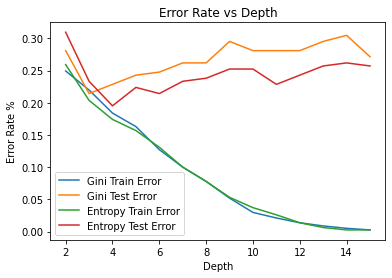

In [20]:
# Plot the 4 learning curves
plt.title('Error Rate vs Depth')
plt.xlabel('Depth')
plt.ylabel('Error Rate %')
plt.plot(np.arange(2,16),trainError_gini, label = 'Gini Train Error')
plt.plot(np.arange(2,16),testError_gini, label = 'Gini Test Error')
plt.plot(np.arange(2,16),trainError_entropy, label = 'Entropy Train Error')
plt.plot(np.arange(2,16),testError_entropy, label = 'Entropy Test Error')
plt.legend()
plt.show()



➡️ Answer containing your analysis of the trend (or if no trend present, offer a hypotheisis of why) here ⬅️